from https://gogul09.github.io/software/flower-recognition-deep-learning

## Start of train.py

In [27]:
# organize imports
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np
import pickle
import h5py
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
# load the user configs
with open('conf/conf_xception.json') as f:    
    config = json.load(f)

# config variables
test_size = config["test_size"]
seed = config["seed"]
features_path = config["features_path"]
labels_path = config["labels_path"]
results = config["results"]
classifier_path = config["classifier_path"]
train_path = config["train_path"]
num_classes = config["num_classes"]

# import features and labels
h5f_data = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string = h5f_label['dataset_1']

features = np.array(features_string)
labels = np.array(labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of features and labels
print("[INFO] features shape: {}".format(features.shape))
print("[INFO] labels shape: {}".format(labels.shape))

[INFO] features shape: (1360, 2048)
[INFO] labels shape: (1360,)


In [30]:
# my logistic regression
features_np = np.array(features)
labels_np = np.array(labels)
print(features_np.shape, labels_np.shape)
(trainData, testData, trainLabels, testLabels) = train_test_split(features_np,
                                                                  labels_np,
                                                                  test_size=0.2, #test_size,
                                                                  random_state=seed)

(1360, 2048) (1360,)


In [31]:
model_LR = LogisticRegression(random_state=seed)
model_LR.fit(trainData, trainLabels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=9, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
model_RF = RandomForest(n_estimators=100, random_state=seed)
model_RF.fit(trainData, trainLabels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=9, verbose=0, warm_start=False)

In [33]:
model_SVC = SVC(random_state = seed)
model_SVC.fit(trainData, trainLabels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=9, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
testLabels_pre = model_LR.predict(testData)
score_LR = accuracy_score(testLabels, testLabels_pre)
# testLabels_pre = model_RF.predict(testData)
# score_RF = accuracy_score(testLabels, testLabels_pre)
# testLabels_pre = model_SVC.predict(testData)
# score_SVC = accuracy_score(testLabels, testLabels_pre)
print(score_LR)


0.948529411765


In [40]:
n_test = len(testLabels_pre)
n_correct = 0
for i, e in enumerate(testLabels_pre):
    if e == testLabels[i]:
        n_correct += 1
print(n_correct/n_test)

0.9485294117647058


In [41]:
# print ("[INFO] training started...")
# # split the training and testing data
# (trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
#                                                                   np.array(labels),
#                                                                   test_size=test_size,
#                                                                   random_state=seed)

# print ("[INFO] splitted train and test data...")
# print ("[INFO] train data  : {}".format(trainData.shape))
# print ("[INFO] test data   : {}".format(testData.shape))
# print ("[INFO] train labels: {}".format(trainLabels.shape))
# print ("[INFO] test labels : {}".format(testLabels.shape))

# use logistic regression as the model
print("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

# use rank-1 and rank-5 predictions
print("[INFO] evaluating model...")
f = open(results, "w")
rank_1 = 0
rank_5 = 0

# loop over test data
for (label_i, features_i) in zip(testLabels, testData):
    # predict the probability of each class label and
    # take the top-5 class labels
    predictions = model.predict_proba(np.atleast_2d(features_i))[0]
    predictions = np.argsort(predictions)[::-1][:5]
    print(label_i,predictions[0])
    # rank-1 prediction increment
    if label_i == predictions[0]:

        rank_1 += 1

    # rank-5 prediction increment
    if label_i in predictions:
        rank_5 += 1
rank_1 = (rank_1 / float(len(testLabels))) * 100
rank_5 = (rank_5 / float(len(testLabels))) * 100

print('rank1 {}, rank5{}'.format(rank_1, rank_5))
# # convert accuracies to percentages

# write the accuracies to file
f.write("Rank-1: {:.2f}%\n".format(rank_1))
f.write("Rank-5: {:.2f}%\n\n".format(rank_5))

# evaluate the model of test data
preds = model.predict(testData)

# write the classification report to file
f.write("{}\n".format(classification_report(testLabels, preds)))
f.close()

[INFO] creating model...
[INFO] evaluating model...
15 14
3 2
3 2
6 5
3 2
2 1
6 0
6 0
7 6
5 4
2 1
5 4
8 7
15 14
4 16
16 15
1 0
10 9
8 7
5 4
8 7
8 7
12 11
5 4
12 11
15 14
1 7
4 3
2 1
14 13
3 2
1 0
2 1
5 4
4 3
11 10
5 4
10 9
17 16
14 13
1 13
5 4
17 16
10 9
2 1
10 9
17 16
10 9
6 5
13 12
6 5
13 12
1 0
9 8
11 10
10 9
16 15
9 8
5 4
13 12
4 3
12 11
10 9
9 8
13 12
6 5
15 14
14 13
1 0
17 16
9 8
13 12
4 3
16 15
13 12
4 3
8 7
10 9
10 9
4 3
3 7
5 4
8 7
12 11
5 4
3 2
7 6
17 16
17 16
11 10
14 13
1 0
10 9
8 7
2 1
4 3
11 10
16 15
16 15
16 15
3 2
8 7
14 14
13 12
16 15
10 9
7 6
15 14
9 8
14 13
7 9
1 0
14 13
15 7
10 9
10 9
1 0
14 13
2 1
6 5
9 8
11 10
16 15
17 16
6 5
16 15
7 6
11 10
3 2
13 12
16 15
2 1
13 12
17 16
9 8
8 7
13 12
10 9
15 0
1 0
13 12
7 6
11 10
7 6
15 14
17 15
12 11
1 0
16 15
13 12
12 11
12 11
7 6
3 2
9 8
15 14
11 10
4 3
13 12
4 3
2 1
15 14
5 4
12 11
1 0
13 12
15 14
16 15
5 4
1 0
4 3
17 16
2 1
5 4
7 6
16 15
6 5
11 10
2 1
16 15
14 13
13 12
8 0
3 2
3 2
8 7
11 10
1 0
13 12
6 5
9 8
17 16
7 6
4 3


[INFO] saving model...
[INFO] confusion matrix


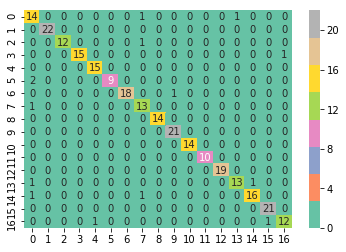

In [42]:
# dump classifier to file
print("[INFO] saving model...")
#f = open(classifier_path, "w")
#f.write(pickle.dumps(model))
#f.close()

# display the confusion matrix
print ("[INFO] confusion matrix")

# get the list of training lables
labels = sorted(list(os.listdir(train_path)))

# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()